In [1]:
%pip install censusdis

  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 65.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 72.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 79.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 32.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 79.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 63.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 24.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 70.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.6 MB/s  0:00:00
Using cached beautifulsoup4-4.14.2-py3-none-any.whl (106 k

In [21]:
import censusdis.data as ced
from censusdis.states import STATE_GA # Example: for Georgia, replace with desired state

# American Community Survey 5-Year Data (e.g., 2022)
DATASET = "acs/acs5"
YEAR = 2022 # Specify the desired year

# Variable for Median Household Income
# You can find variable codes on the Census API documentation
MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"

In [24]:
 # Download data for all counties in a specific state
 # Replace STATE_GA with the desired state constant (e.g., STATE_NY for New York)
county_income_data = ced.download(
    DATASET,
    download_variables = ["NAME",MEDIAN_HOUSEHOLD_INCOME_VARIABLE], # Include "NAME" for county names
    state=STATE_GA,
    county="*", # "*" indicates all counties in the specified state
    vintage=YEAR
)

    # If you want data for all counties in the entire US (can be a large dataset)
    # county_income_data_us = ced.download(
    # DATASET,
    # [MEDIAN_HOUSEHOLD_INCOME_VARIABLE, "NAME"],
    # county="*",
    # year=YEAR
    # )

In [58]:
import censusdis.data as ced
from censusdis.datasets import ACS5
from censusdis import states
import pandas as pd
import os

years = [2010, 2011, 2012, 2013,2014,2015,2016,2017]
dfs = []
for state_code in states.ALL_STATES_AND_DC:  # loop over all 50 states
    for year in years:
        df = ced.download(
            dataset="acs/acs5",
            vintage=year,
            download_variables=['NAME', 'B19013_001E'],
            state=state_code,
            county='*'
        )
        df['Year'] = year
        df.rename(columns={'B19013_001E': 'Median Household Income'}, inplace=True)
        dfs.append(df)

all_states_df = pd.concat(dfs, ignore_index=True)
all_states_df.sample(15)

,STATE,COUNTY,NAME,Median Household Income,Year
23118,51,083,"Halifax County, Virginia",35093.0,2014
9124,22,047,"Iberville Parish, Louisiana",45368.0,2013
24853,55,087,"Outagamie County, Wisconsin",59806.0,2016
22991,51,131,"Northampton County, Virginia",33635.0,2013
19172,46,031,"Corson County, South Dakota",32892.0,2014
7994,21,101,"Henderson County, Kentucky",40438.0,2010
17072,40,049,"Garvin County, Oklahoma",37785.0,2010
2891,12,003,"Baker County, Florida",46865.0,2014
292,01,063,"Greene County, Alabama",22170.0,2014
11347,26,083,"Keweenaw County, Michigan",39821.0,2011


In [25]:
# Rename the income column for clarity
county_income_data = county_income_data.rename(columns={MEDIAN_HOUSEHOLD_INCOME_VARIABLE: "Median Household Income"})
county_income_data.head()


,STATE,COUNTY,NAME,Median Household Income
0,13,001,"Appling County, Georgia",43268
1,13,003,"Atkinson County, Georgia",38007
2,13,005,"Bacon County, Georgia",43938
3,13,007,"Baker County, Georgia",45417
4,13,009,"Baldwin County, Georgia",54699


In [44]:
import pandas as pd
file_middle = ['2012_2010','2013_2011','2014_2012','2015_2013','2016_2014','2017_2015','2018_2016','2019_2017']
file_start = 'MMG'
file_end = 'Data_ToShare.xlsx'
files = [file_start + middle + file_end for middle in file_middle]
food_data = pd.DataFrame()
for file in files:
    new = pd.read_excel(file,sheet_name= 'County')
    new['Year'] = int(file[8:12])
    new.columns = [column.strip().replace('#','Number').replace('insecurity','Insecurity').replace('% food','% of food').replace('food','Food').replace('Insecure Persons in','Insecure Persons').replace('rate','Rate') for column in new.columns]
    food_data = pd.concat([food_data,new], axis = 0,ignore_index= True)

food_data.head()

,FIPS,State,"County, State",Food Insecurity Rate,Number of Food Insecure Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate,Number of Food Insecure Children,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Weighted Annual Food Budget Shortfall,Year
0,1001,AL,"Autauga County, Alabama",0.134,7140,1.3,SNAP,1.85,Other Nutrition Program,0.327,0.208,0.465,0.203,2980.0,0.51,0.49,2.58,3170830,2010
1,1003,AL,"Baldwin County, Alabama",0.134,23570,1.3,SNAP,1.85,Other Nutrition Program,0.347,0.287,0.366,0.238,9720.0,0.59,0.41,2.64,10710730,2010
2,1005,AL,"Barbour County, Alabama",0.232,6440,1.3,SNAP,1.85,Other Nutrition Program,0.479,0.171,0.350,0.258,1600.0,0.87,0.13,2.53,2804540,2010
3,1007,AL,"Bibb County, Alabama",0.157,3550,1.3,SNAP,1.85,Other Nutrition Program,0.358,0.288,0.354,0.249,1300.0,0.64,0.36,2.55,1558200,2010
4,1009,AL,"Blount County, Alabama",0.126,7160,1.3,SNAP,1.85,Other Nutrition Program,0.410,0.305,0.285,0.254,3540.0,0.53,0.47,2.50,3081120,2010


In [27]:
food_data.columns 

Index(['FIPS', 'State', 'County, State', 'Food Insecurity Rate',
       'Number of Food Insecure Persons', 'Low Threshold in state',
       'Low Threshold Type', 'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       'Child Food Insecurity Rate', 'Number of Food Insecure Children',
       '% of Food insecure children in HH w/ HH incomes below 185 FPL',
       '% of Food insecure children in HH w/ HH incomes above 185 FPL',
       'Cost Per Meal', 'Weighted Annual Food Budget Shortfall'],
      dtype='object')

In [28]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25140 entries, 0 to 25139
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   FIPS                                                           25140 non-null  int64  
 1   State                                                          25140 non-null  object 
 2   County, State                                                  25140 non-null  object 
 3   Food Insecurity Rate                                           25140 non-null  float64
 4   Number of Food Insecure Persons                                25140 non-null  int64  
 5   Low Threshold in state                                         25140 non-null  float64
 6   Low Threshold Type                                             25140 non-null  object 
 7   High Threshold in state                                   

In [29]:
food_data = food_data.loc[food_data['Child Food Insecurity Rate']!= '-*']

In [30]:
food_data['Child Food Insecurity Rate'] = food_data['Child Food Insecurity Rate'].astype('float')
food_data['% of Food insecure children in HH w/ HH incomes below 185 FPL'] = food_data['% of Food insecure children in HH w/ HH incomes below 185 FPL'].astype('float')
food_data['% of Food insecure children in HH w/ HH incomes above 185 FPL'] = food_data['% of Food insecure children in HH w/ HH incomes above 185 FPL'].astype('float')

Text(0, 0.5, 'Count')

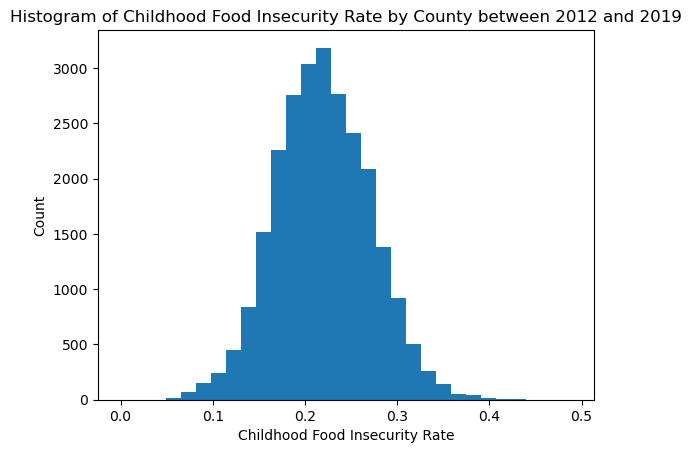

In [31]:
food_data['Child Food Insecurity Rate'].hist(grid = False, bins = 30)
import matplotlib.pyplot as plt
plt.title('Histogram of Childhood Food Insecurity Rate by County between 2012 and 2019')
plt.xlabel('Childhood Food Insecurity Rate')
plt.ylabel('Count')

<Axes: xlabel='Child Food Insecurity Rate', ylabel='Density'>

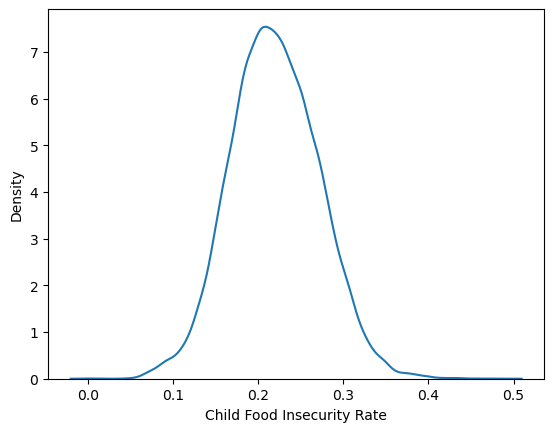

In [32]:
import seaborn as sns
sns.kdeplot(data = food_data, x = 'Child Food Insecurity Rate')

In [33]:
food_data.loc[food_data['FIPS'].isin([1001,36061])]

,FIPS,State,"County, State",Food Insecurity Rate,Number of Food Insecure Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate,Number of Food Insecure Children,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Weighted Annual Food Budget Shortfall
0,1001,AL,"Autauga County, Alabama",0.134,7140,1.3,SNAP,1.85,Other Nutrition Program,0.327,0.208,0.465,0.203,2980.0,0.510,0.490,2.580000,3170830
1858,36061,NY,"New York County, New York",0.131,206770,1.3,SNAP,1.85,Other Nutrition Program,0.495,0.164,0.341,0.213,50670.0,0.630,0.370,3.910000,139161760
3143,1001,AL,"Autauga County, Alabama",0.136,7310,1.3,SNAP,1.85,Other Nutrition Program,0.385,0.170,0.445,0.196,2890.0,0.630,0.370,2.820000,3360680
5001,36061,NY,"New York County, New York",0.163,259340,1.3,SNAP,1.85,Other Nutrition Program,0.542,0.126,0.332,0.222,53250.0,0.609,0.391,3.910000,165313010
6286,1001,AL,"Autauga County, Alabama",0.135,7360,1.3,SNAP,1.85,Other Nutrition Program,0.423,0.162,0.414,0.205,3010.0,0.630,0.370,2.986678,3850000
8144,36061,NY,"New York County, New York",0.162,258970,2.0,"SNAP, Other Nutrition Programs",2.00,"SNAP, Other Nutrition Programs",0.698,0.000,0.302,0.220,52470.0,0.610,0.390,3.989642,180950000
9429,1001,AL,"Autauga County, Alabama",0.139,7620,1.3,SNAP,1.85,Other Nutrition Program,0.461,0.170,0.370,0.215,3090.0,0.690,0.310,3.060000,4132000
11287,36061,NY,"New York County, New York",0.153,246120,2.0,"SNAP, Other Nutrition Programs",2.00,"SNAP, Other Nutrition Programs",0.713,0.000,0.287,0.209,49480.0,0.650,0.350,4.370000,190517000
12572,1001,AL,"Autauga County, Alabama",0.144,7930,1.3,SNAP,1.85,Other Nutrition Program,0.451,0.193,0.356,0.224,3190.0,0.720,0.280,3.160000,4425000
14430,36061,NY,"New York County, New York",0.151,243570,2.0,"SNAP, Other Nutrition Programs",2.00,"SNAP, Other Nutrition Programs",0.733,NaN,0.267,0.190,45200.0,0.650,0.350,4.580000,197030000


In [34]:
numeric_data = food_data.iloc[:,[5,7,11,12,14,15,16]]
numeric_data.corr()

,Low Threshold in state,High Threshold in state,% FI > High Threshold,Child Food Insecurity Rate,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal
Low Threshold in state,1.000000,0.836389,0.059251,-0.123706,-0.094574,0.093758,0.164580
High Threshold in state,0.836389,1.000000,0.011019,-0.103963,-0.051564,0.050871,0.167665
% FI > High Threshold,0.059251,0.011019,1.000000,-0.485914,-0.752448,0.753712,0.124791
Child Food Insecurity Rate,-0.123706,-0.103963,-0.485914,1.000000,0.435442,-0.434150,-0.274379
% of Food insecure children in HH w/ HH incomes below 185 FPL,-0.094574,-0.051564,-0.752448,0.435442,1.000000,-0.989176,-0.146106
% of Food insecure children in HH w/ HH incomes above 185 FPL,0.093758,0.050871,0.753712,-0.434150,-0.989176,1.000000,0.151015
Cost Per Meal,0.164580,0.167665,0.124791,-0.274379,-0.146106,0.151015,1.000000


In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

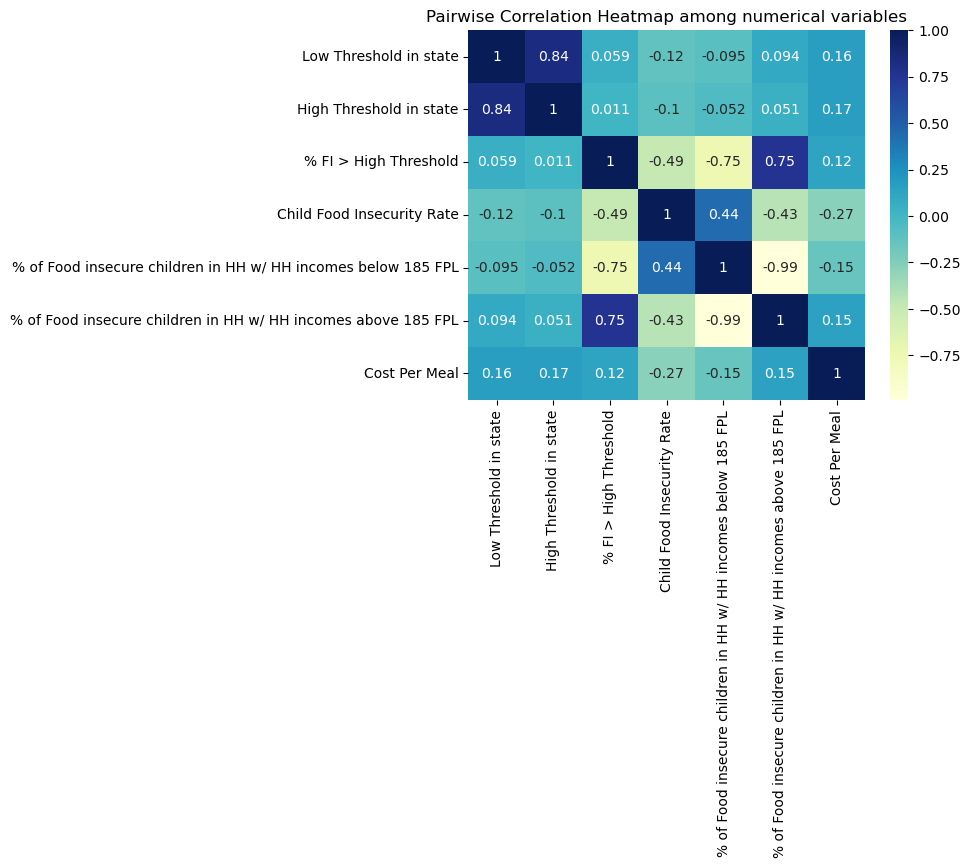

In [36]:
corr = numeric_data.corr()
sns.heatmap(corr,cmap="YlGnBu", annot=True)
plt.title('Pairwise Correlation Heatmap among numerical variables')
plt.show()

In [37]:
county_income_data['FIPS'] = county_income_data['STATE'].astype(str) + county_income_data['COUNTY'].astype(str)
county_income_data.head()

,STATE,COUNTY,NAME,Median Household Income,FIPS
0,13,001,"Appling County, Georgia",43268,13001
1,13,003,"Atkinson County, Georgia",38007,13003
2,13,005,"Bacon County, Georgia",43938,13005
3,13,007,"Baker County, Georgia",45417,13007
4,13,009,"Baldwin County, Georgia",54699,13009


In [38]:
county_income_data['FIPS'] = county_income_data['FIPS'].astype(int)

In [39]:
join_data = county_income_data[['FIPS','Median Household Income']]
food_data = food_data.merge(join_data,how='left',on='FIPS')

In [40]:
food_data.loc[food_data['State'] == 'GA']

,FIPS,State,"County, State",Food Insecurity Rate,Number of Food Insecure Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate,Number of Food Insecure Children,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Weighted Annual Food Budget Shortfall,Median Household Income
387,13001,GA,"Appling County, Georgia",0.186,3360,1.3,SNAP,1.85,Other Nutrition Program,0.557,0.193,0.251,0.334,1520.0,0.66,0.34,2.37,1370700,43268.0
388,13003,GA,"Atkinson County, Georgia",0.231,1920,1.3,SNAP,1.85,Other Nutrition Program,0.607,0.291,0.102,0.401,1010.0,0.80,0.20,2.16,713860,38007.0
389,13005,GA,"Bacon County, Georgia",0.169,1850,1.3,SNAP,1.85,Other Nutrition Program,0.453,0.393,0.154,0.265,760.0,0.70,0.30,2.37,754700,43938.0
390,13007,GA,"Baker County, Georgia",0.253,920,1.3,SNAP,1.85,Other Nutrition Program,0.559,0.173,0.268,0.306,330.0,0.88,0.13,2.74,433900,45417.0
391,13009,GA,"Baldwin County, Georgia",0.257,12050,1.3,SNAP,1.85,Other Nutrition Program,0.456,0.156,0.388,0.299,2630.0,0.81,0.19,2.48,5143920,54699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,13313,GA,"Whitfield County, Georgia",0.090,9370,1.3,SNAP,1.85,Other Nutrition Program,0.708,0.207,0.086,0.211,5880.0,0.82,0.18,2.83,4525000,59659.0
22538,13315,GA,"Wilcox County, Georgia",0.170,1510,1.3,SNAP,1.85,Other Nutrition Program,0.476,0.165,0.360,0.233,400.0,0.85,0.15,2.84,732000,46759.0
22539,13317,GA,"Wilkes County, Georgia",0.192,1900,1.3,SNAP,1.85,Other Nutrition Program,0.651,0.203,0.146,0.274,560.0,0.82,0.19,3.17,1029000,51780.0
22540,13319,GA,"Wilkinson County, Georgia",0.175,1600,1.3,SNAP,1.85,Other Nutrition Program,0.593,0.146,0.261,0.235,500.0,0.78,0.22,2.87,784000,40757.0
